#### Imports

In [105]:
import joblib
from collections import Counter

import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
sns.set_theme(style="darkgrid", palette="muted", rc={"figure.figsize": (10, 6)})

# Stellar Object Classification with the SDSS 17 Dataset.

Stellar object are naturally occuring physical entities within the physical universe. They can be a broad array of different entities with markedly different physical characteristics. In this analysis, I focus on three types: Galaxies, Stars, and Quasi-Stellar Objects (also known as quasars or QSOs).

Stars are object similar to our own Sun, although they have quite a broad array of different types with different characteristics. They are spheres of plasma held together by gravity. Galaxies are objects like our very own Milky Way, although like stars, there are a broad array of different types. Galaxies are collections of stars, gas, dust, dark matter, and various other entities held together through gravity. Very commonly there will be a supermassive black hole at the center of the galaxy. Finally, quasars are extremely luminous active galactic nuclei (AGN). This means that we have a supermassive black hole in which the amount of matter falling into it is enough that the black hole is heated up enough to emit immense amounts of radiation in a beam from the accretion disk. Each of these objects have unique spectroscopic results allowing researchers to determine the type of object that they are and allow for further study of these objects.

As such classifying these objects is a matter of critical importance for futher study and data science has tools that will allow us to do precisely that. In particular,  EDA techniques can allow a deeper understanding of the differences in these datasets and machine learning classification tools can be used to automate the classification of large volumes of data such as those collected by future sky surveys by the SDSS teams.

I will be conducting EDA of the data to explore what we can learn from the dataset itself and conducting machine learning to see if we can develop a useful classifier for the Sloan Digital Sky Survey 17 data.

On a personal level, this project was about combining my current passion and profession, data science, and a rekindling of previous passion and profession, astrophysics. I would like to continue applying my skills in data science to the field of astrophysics and this project serves as a first step back into the field for me.

If you would like to cite this work please cite this notebook on Kaggle or repository on my GitHub.

Author information:
- Author: David Blankenship (aka General Cow)
- Email: dblankj@gmail.com
- Github: https://github.com/General-Cow/StellarObjectClassification
- Kaggle: https://www.kaggle.com/code/generalcow/stellarobjectclassification

#### Citations

The SDSS 17 dataset I am using was obtained from the below cited Kaggle noteboook. The source of all data was from the Sloan Digitial Sky Survey teams. I also copy the acknowledgements fedesoriano cited here.

fedesoriano. (January 2022). Sloan Digital Sky Survey DR16. Retrieved 14 March 2025 from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.


The SDSS 16 dataset I am using was obtained from the below cited Kaggle noteboook.

Mukharbek Organokov. (December 2019). Stellar Classification Dataset - SDSS17. Retrieved 15 March 2025 from https://www.kaggle.com/datasets/muhakabartay/sloan-digital-sky-survey-dr16.

#### Acknowledgements
The data released by the SDSS is under public domain. Its taken from the current data release RD17.

More information about the license: http://www.sdss.org/science/image-gallery/
#### SDSS Publications:

Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026]

# Initial Analysis

In [9]:
raw_df = pd.read_csv('star_classification.csv')
raw_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

No missing values (nominally as we will see)

To drop:

run id, rerun id, cam col, field id, spec obj id, fiber_id, mjd and plate. None of these should have any real bearing on the analysis.

In [10]:
raw_df.drop(['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID', 'plate', 'MJD'], axis=1, inplace=True)

In [20]:
raw_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,redshift
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


Need to handle outliers in the filters. Either remove if too many or figure out imputation strategy. These are almost certainly null values.

In [21]:
raw_df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

Imbalanced Data! Will need to stratify.

In [11]:
df, df_test = train_test_split(raw_df, test_size=0.2, random_state=269, stratify=raw_df['class'])

In [23]:
df.shape

(80000, 10)

In [24]:
df_test.shape

(20000, 10)

# EDA

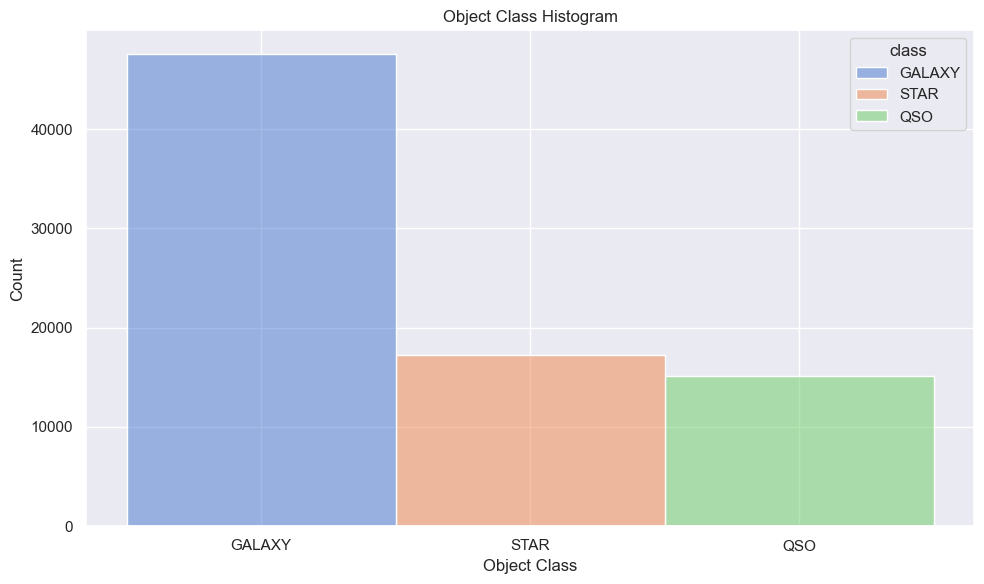

In [27]:
sns.histplot(x=df['class'], hue=df['class'])
plt.title('Object Class Histogram')
plt.xlabel('Object Class')
plt.tight_layout()
plt.show()

### Missing Value Analysis

u, g, and z have values of -9999 which are obviously nulls. How many of these are there actually?

In [28]:
df['u'].describe()

count    80000.000000
mean        21.956155
std         35.501291
min      -9999.000000
25%         20.354637
50%         22.185335
75%         23.689240
max         30.660390
Name: u, dtype: float64

In [35]:
df[df['u'] <= 0]['u'].count()

1

In [38]:
df[df['u'] <= 0]['u']

79543   -9999.0
Name: u, dtype: float64

In [39]:
df[df['u'] >= 0]['u'].describe()

count    79999.000000
mean        22.081419
std          2.250740
min         10.996230
25%         20.354670
50%         22.185370
75%         23.689240
max         30.660390
Name: u, dtype: float64

In [32]:
df['g'].describe()

count    80000.000000
mean        20.507954
std         35.483378
min      -9999.000000
25%         18.968090
50%         21.101200
75%         22.126840
max         31.602240
Name: g, dtype: float64

In [36]:
df[df['g'] <= 0]['g'].count()

1

In [40]:
df[df['g'] <= 0]['g']

79543   -9999.0
Name: g, dtype: float64

In [41]:
df[df['g'] <= 0]

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,STAR,0.000089


In [37]:
df[df['z'] <= 0]['z'].count()

1

Theres literally 1 at the -9999 value and it's the exact same object. I'm simply going to drop this 1 row for simplicity. Will need to check in test set.

In [48]:
raw_df[raw_df['u'] <=0]

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,STAR,0.000089


Nope just the one.

In [12]:
df.drop(index=79543, inplace=True)
df.shape

(79999, 10)

### Outlier Analysis

In [83]:
def bnv_plotter(feature, save=False):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
    

    sns.boxplot(x=df[f"{feature}"],
            ax=axes[0]
        )
    axes[0].set_title(f"{feature} Boxplot")
    
    sns.violinplot(
        x=df[f"{feature}"],
            ax=axes[1]
        )
    axes[1].set_title(f"{feature} Violinplot")
    
    plt.tight_layout()

    if save:
        plt.savefig(f'{feature}_test.png')
    plt.show()

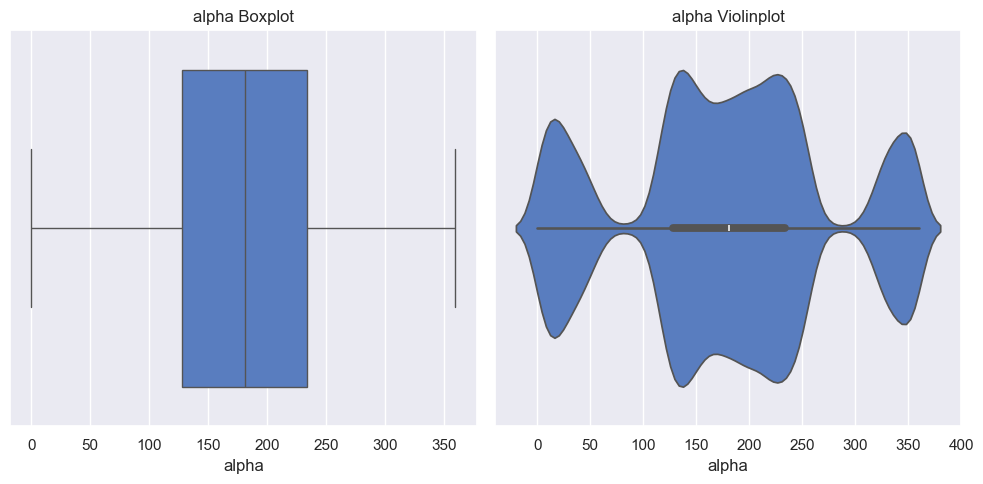

In [64]:
bnv_plotter('alpha')

Need to refamiliarize myself with the RA but the pinches almost certainly have meaning.

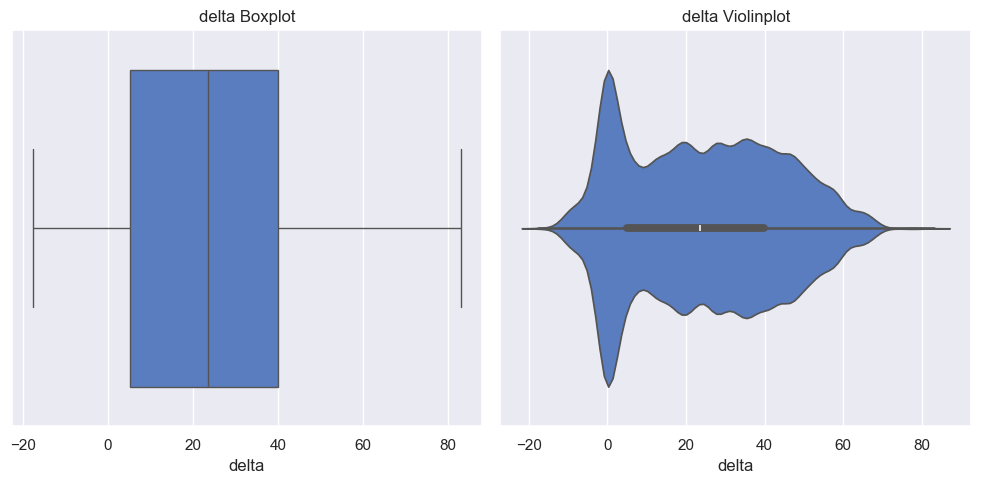

In [65]:
bnv_plotter('delta')

As above need to refamiliarize myself with Declination, but the 0 peak is probably meaningful physically.

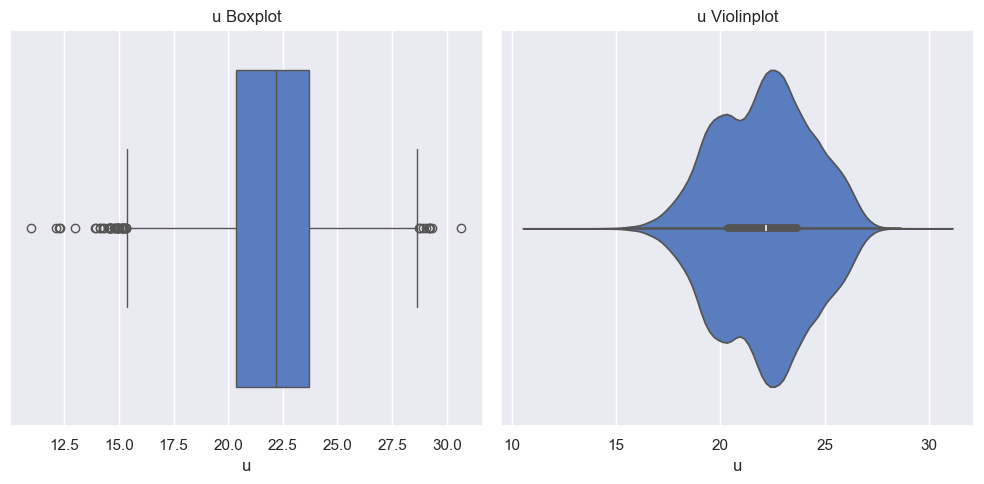

In [66]:
bnv_plotter('u')

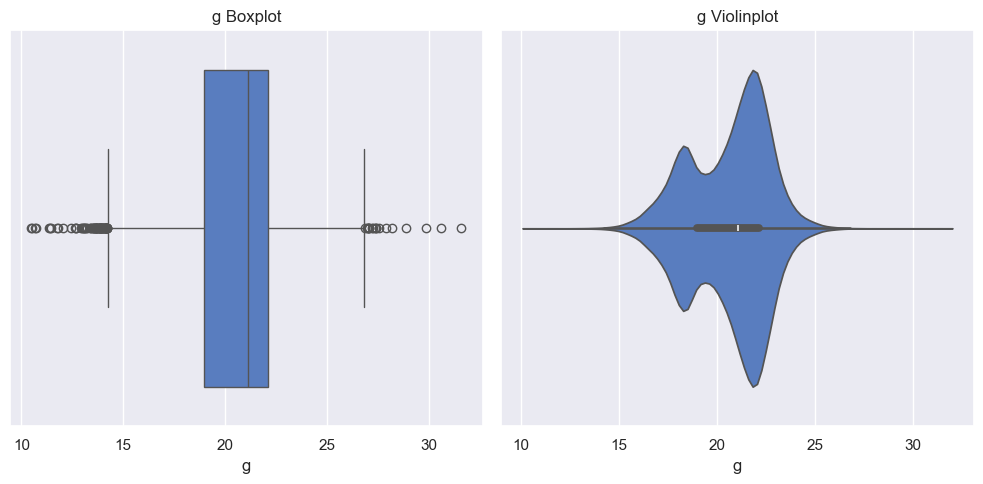

In [67]:
bnv_plotter('g')

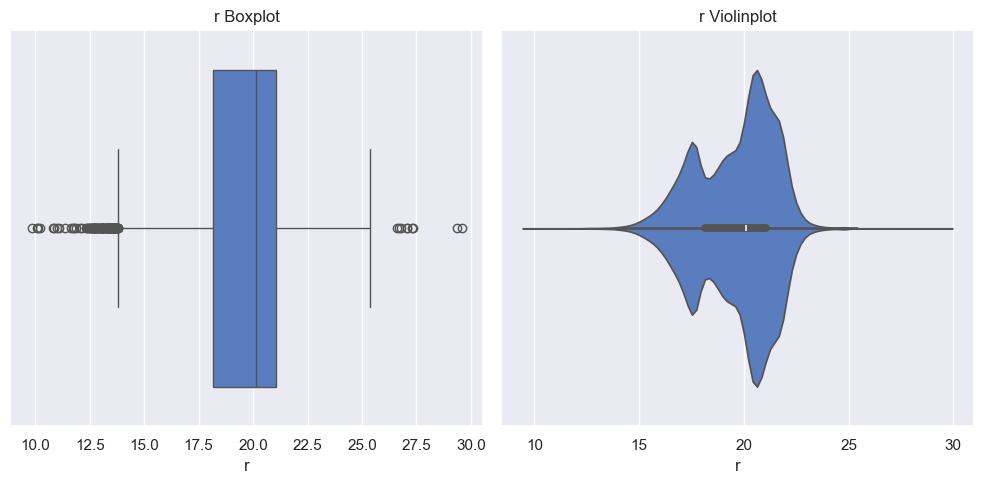

In [60]:
bnv_plotter('r')

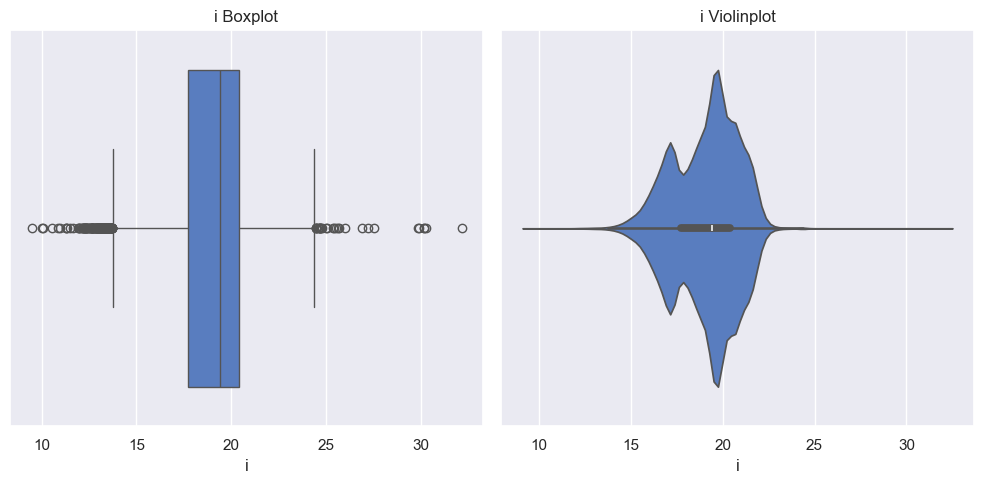

In [68]:
bnv_plotter('i')

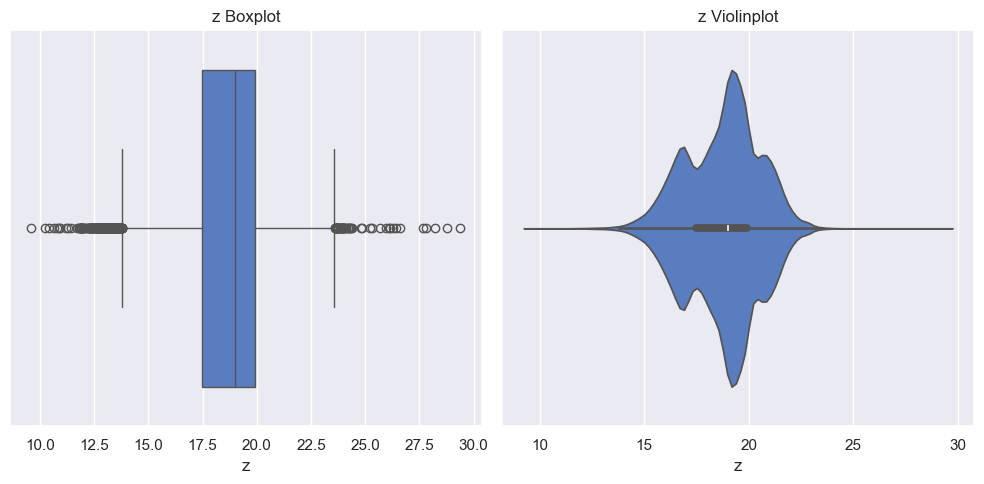

In [86]:
bnv_plotter('z')

These filters are from ultraviolet to infrared.

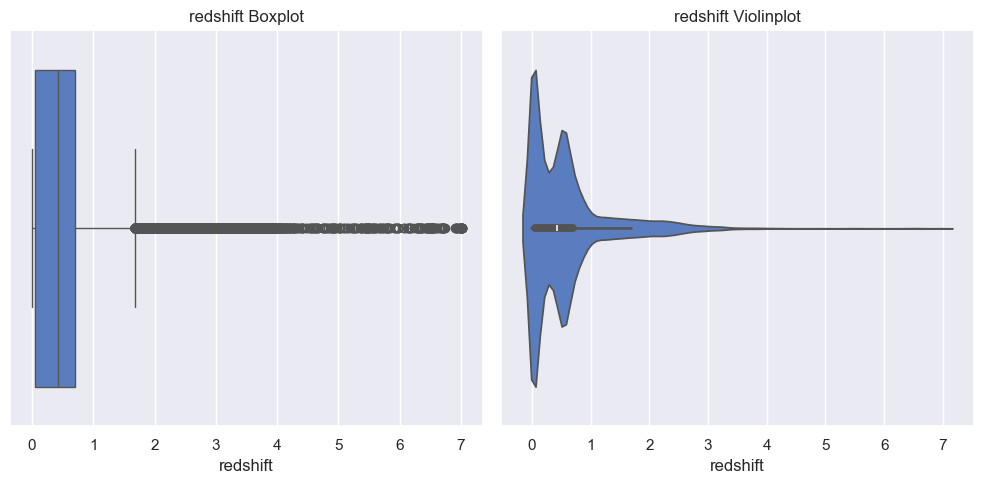

In [70]:
bnv_plotter('redshift')

Interesting dual peak to the redshift.

There are a lot of outliers, but I'm not really inclined to drop any at this time.

### Univariate Analysis

In [ ]:
def unih_plotter(feature, save=False):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
    

    sns.boxplot(x=df[f"{feature}"],
            ax=axes[0]
        )
    axes[0].set_title(f"{feature} Boxplot")
    
    sns.violinplot(
        x=df[f"{feature}"],
            ax=axes[1]
        )
    axes[1].set_title(f"{feature} Violinplot")
    
    plt.tight_layout()

    if save:
        plt.savefig(f'{feature}_test.png')
    plt.show()

In [74]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class',
       'redshift'],
      dtype='object')

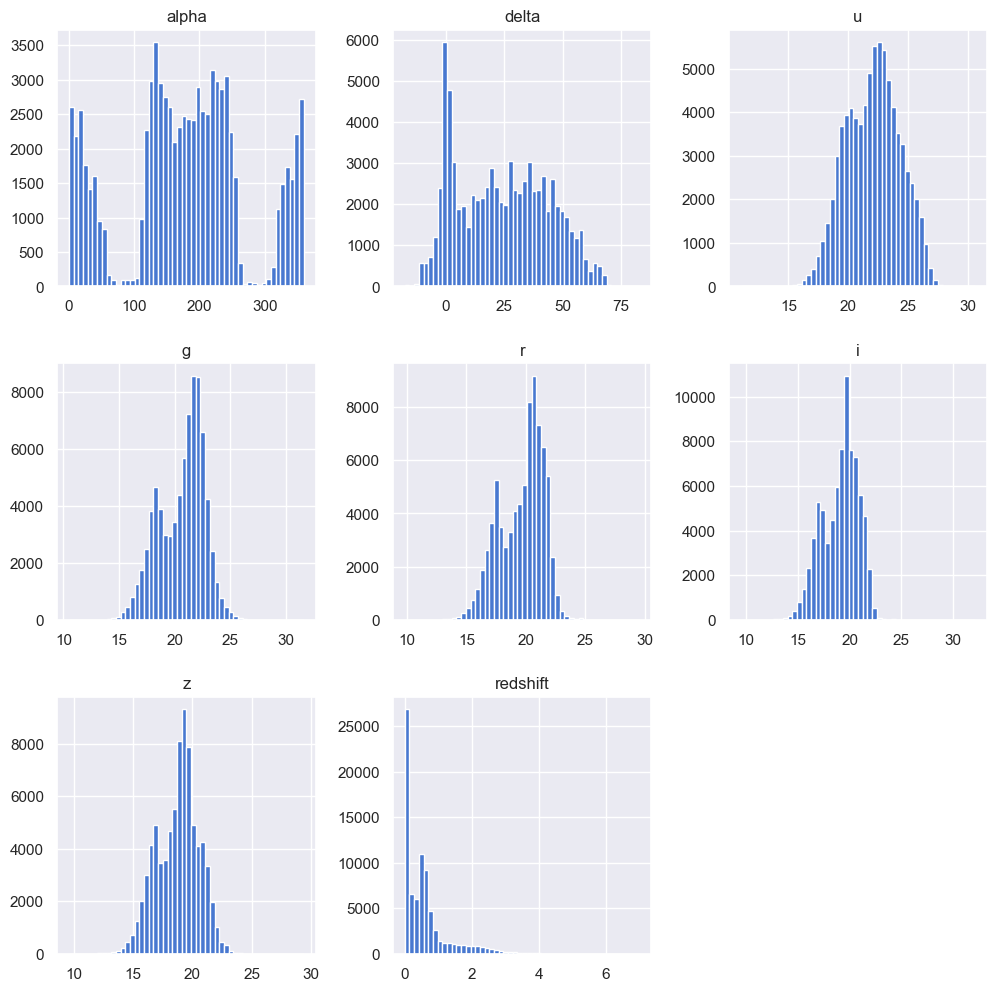

In [90]:
df.hist(column=['alpha', 'delta', 'u', 'g', 'r', 'i', 'z',
       'redshift'], bins=50, figsize=(12,12))
plt.show()

Most of our feature are happily normal enough with the exception of alpha, which won't be helped by a log transformation, and redshift, which may.

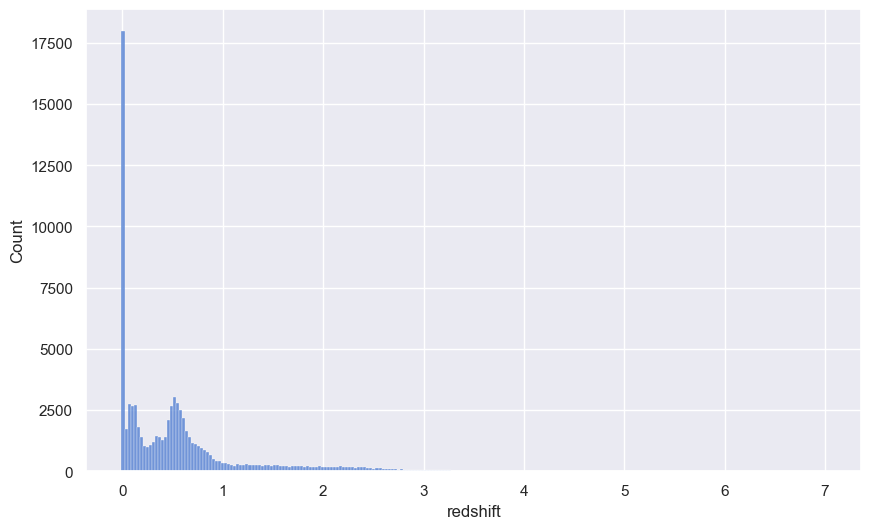

In [81]:
sns.histplot(df['redshift'],log_scale=False)
plt.show()

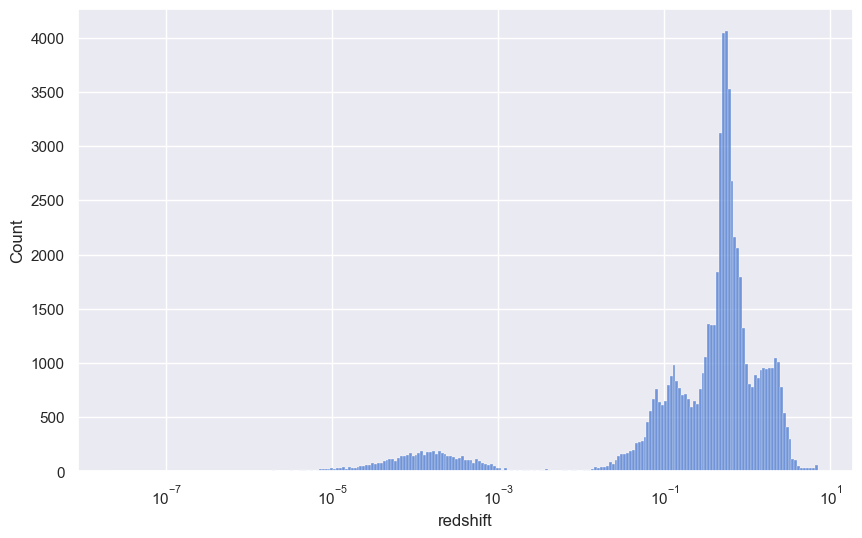

In [80]:
sns.histplot(df['redshift'],log_scale=True)
plt.show()

Very interesting distribution! Basically two distributions of redshift, the left one is very much a normal distribution and the right one is sort of normal, sort of maybe several overlapping distros? I will consider a log transform for this feature.

In [6]:
redshift_log = np.log(df['redshift'])

C:\Users\dblan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dblan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
redshift_log.isnull().sum()

11002

In [19]:
np.isinf(redshift_log).sum()

333

In [20]:
df['redshift'].isnull().sum()

0

In [21]:
np.isinf(df['redshift']).sum()

0

Unfortunately, there are values at 0 and belows meaning the log transformation is missing a sizable chunk of values. I elect to leave it without transforming for now.

In [92]:
df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']].describe()

,alpha,delta,u,g,r,i,z,redshift
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,177.927677,24.118158,22.081419,20.633199,19.645726,19.085249,18.769857,0.577774
std,96.465249,19.633878,2.250740,2.038890,1.854281,1.758124,1.766450,0.731195
min,0.005528,-17.636198,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,127.720119,5.128172,20.354670,18.968205,18.141875,17.733120,17.464675,0.054639
50%,181.188560,23.612014,22.185370,21.101220,20.126330,19.407930,19.005590,0.425077
75%,234.121821,39.883399,23.689240,22.126890,21.045330,20.393875,19.919065,0.704449
max,359.999810,83.000519,30.660390,31.602240,29.571860,32.141470,29.383740,7.011245


### Bivariate Analysis

alpha and delta here, maybe with redshift too lol. Also redshift by class, though thats probably in univar

In [98]:
num_features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

#### All Feature Comparison

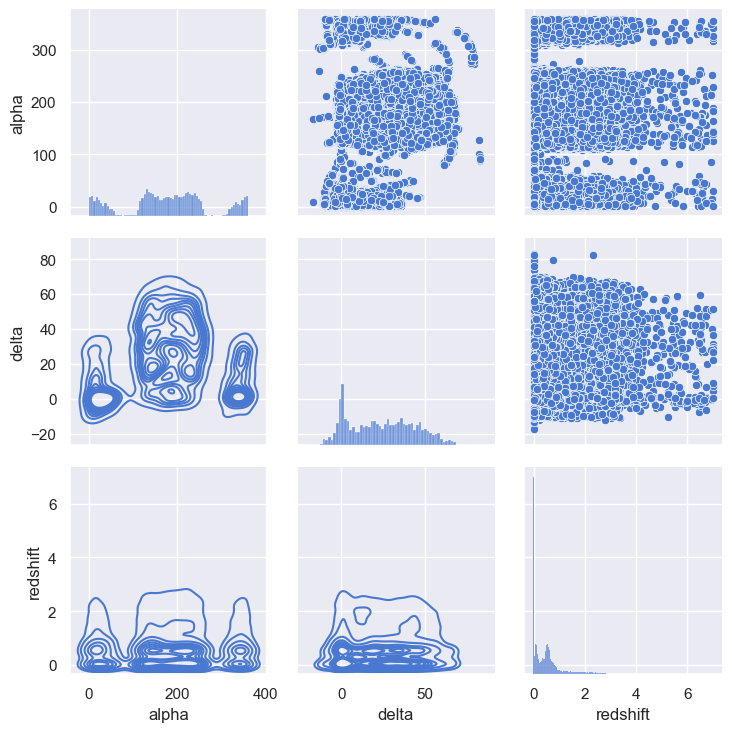

In [123]:
g = sns.PairGrid(df[['alpha','delta', 'redshift']])
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

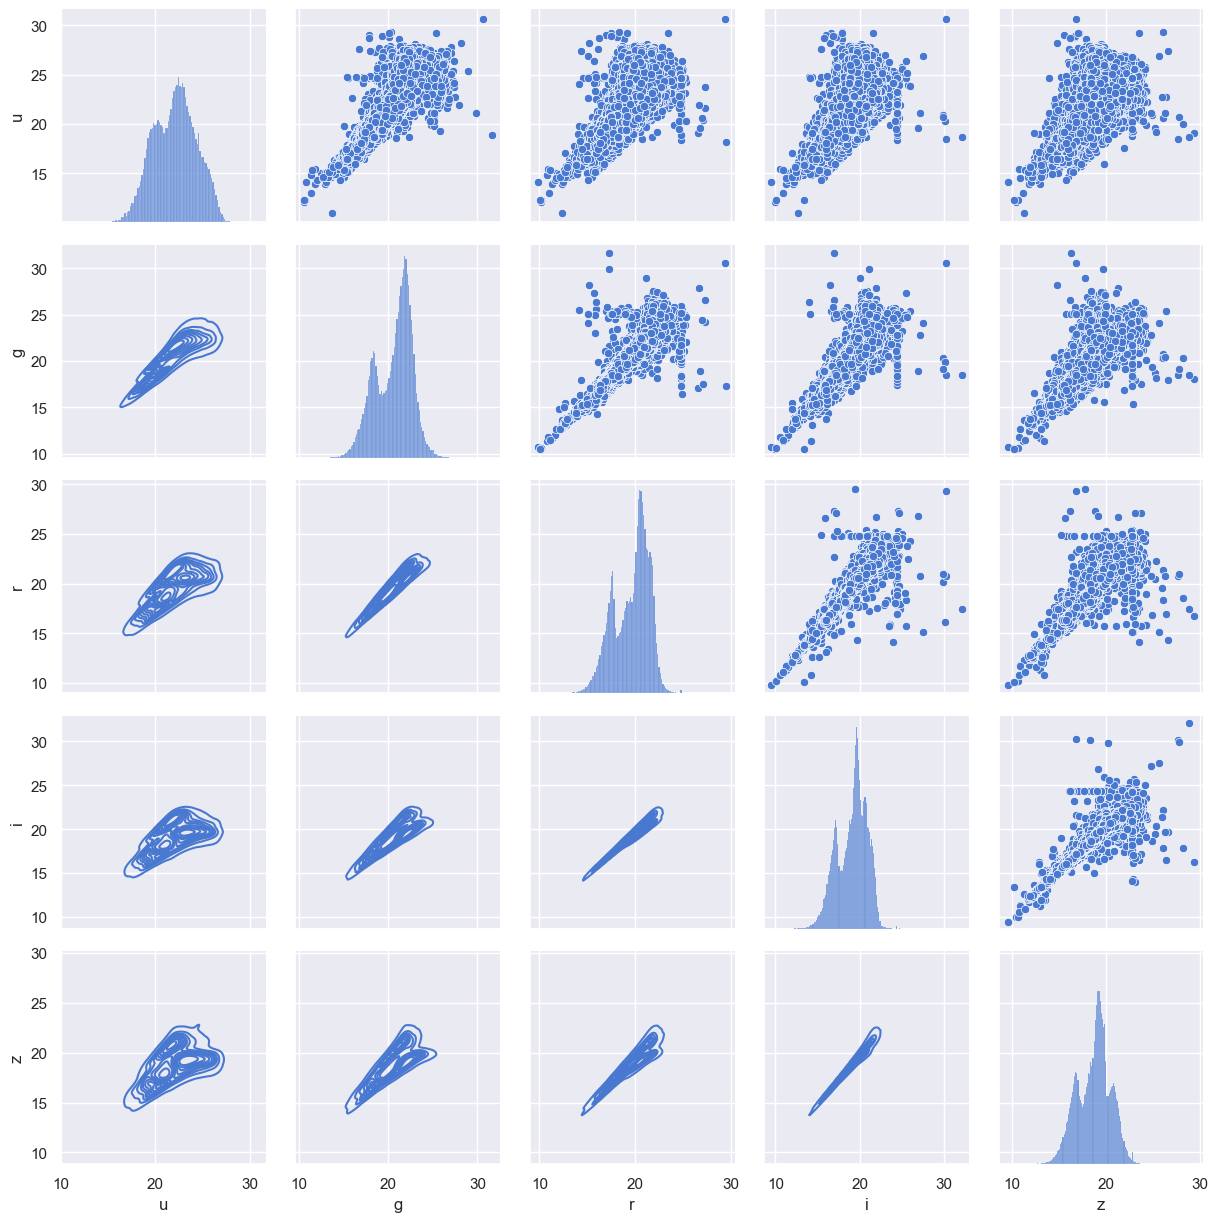

In [122]:
g = sns.PairGrid(df[['u', 'g', 'r', 'i', 'z']])
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

#### Feature by Class

Section for analyzing features by the object class.

In [100]:
def bnv_bivar_plotter(feature, save=False):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
    

    sns.boxplot(x=df[f"{feature}"], y=df['class'],
            ax=axes[0]
        )
    axes[0].set_title(f"{feature} by Class Boxplot")
    
    sns.violinplot(
        x=df[f"{feature}"], y=df['class'],
            ax=axes[1]
        )
    axes[1].set_title(f"{feature} by Class Violinplot")
    
    plt.tight_layout()

    if save:
        plt.savefig(f'{feature}_test.png')
    plt.show()

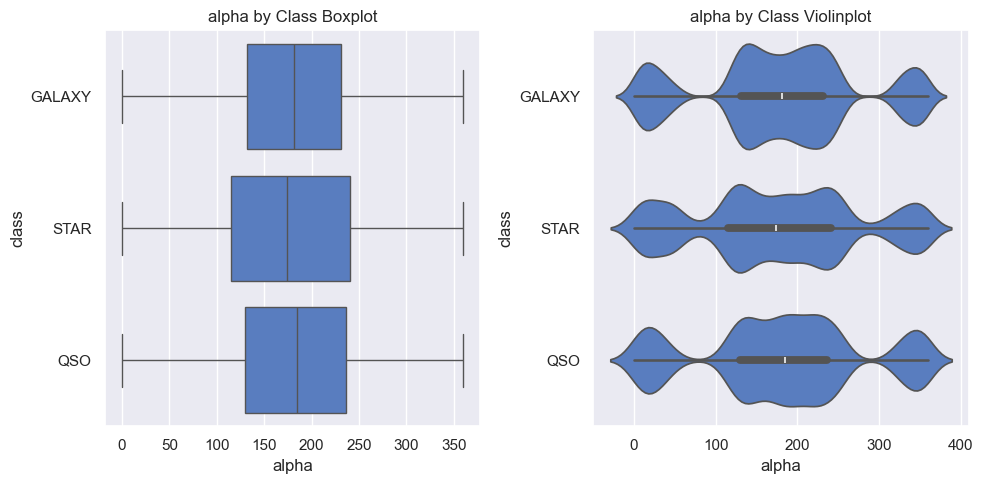

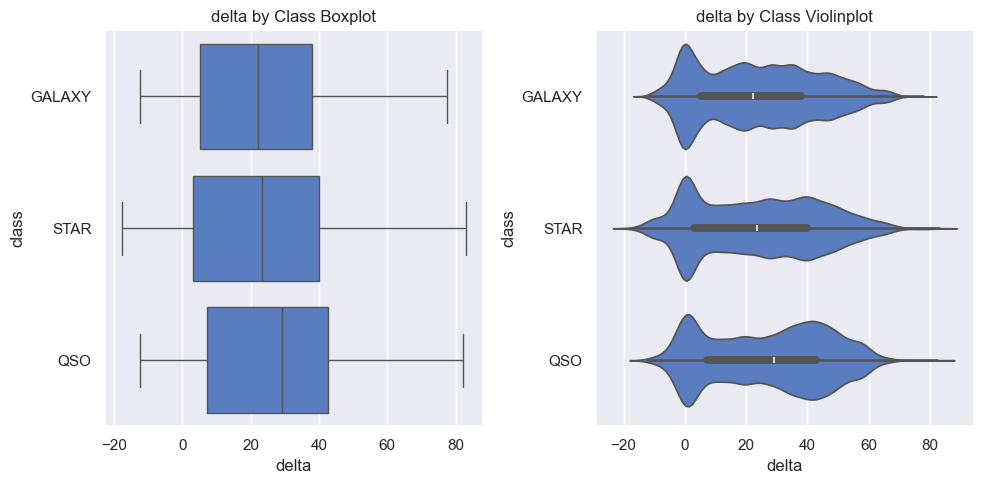

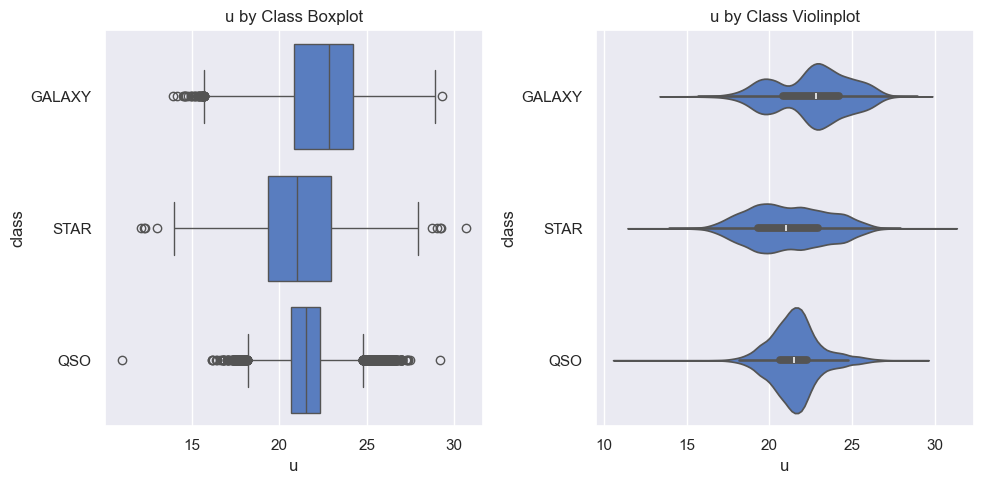

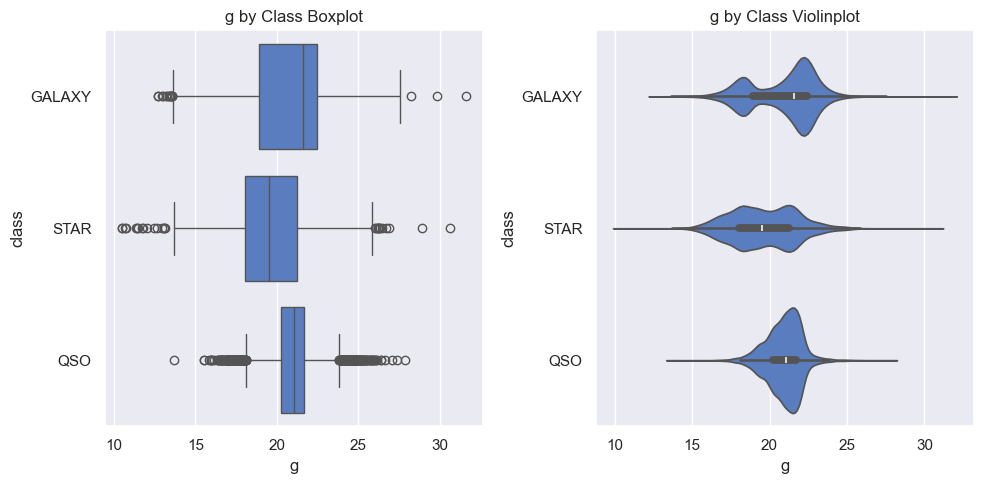

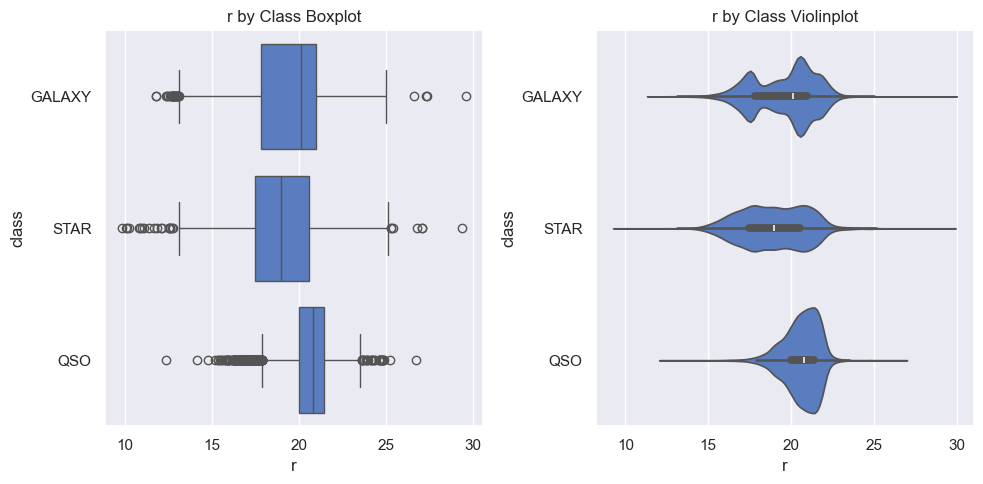

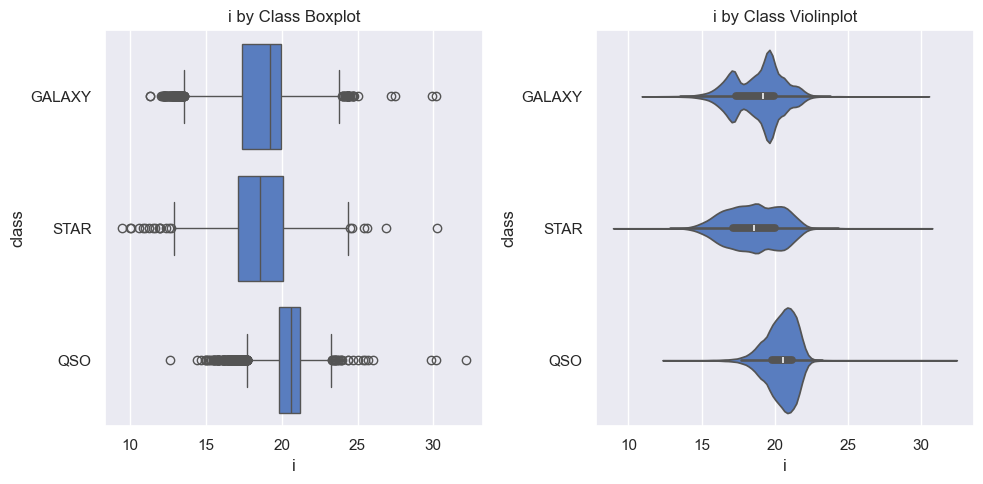

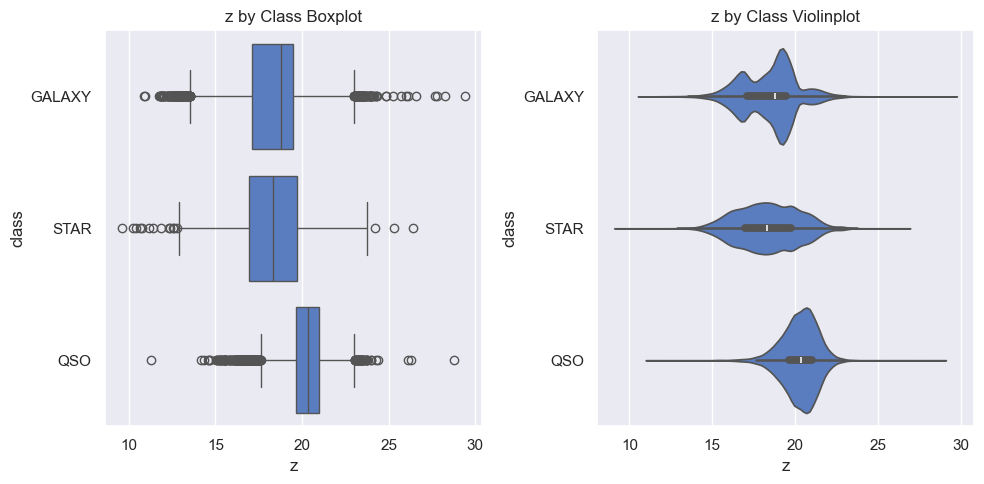

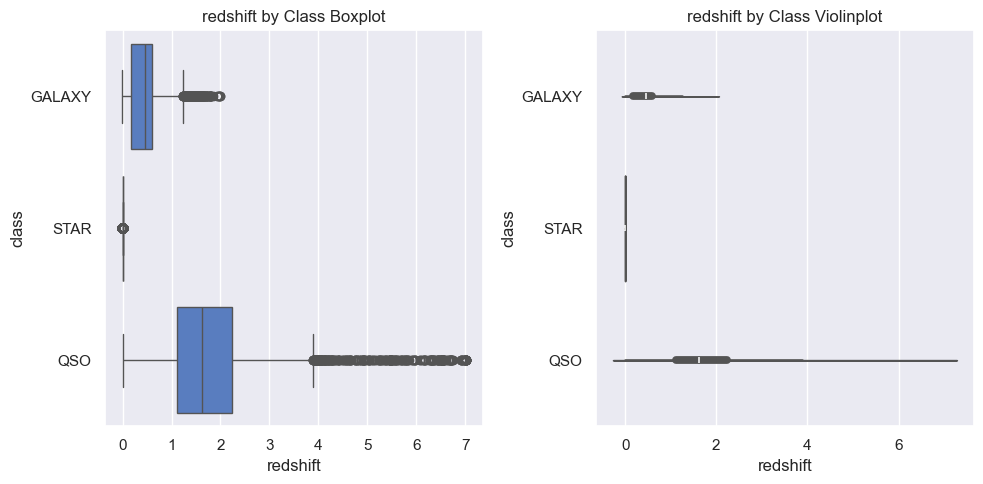

In [101]:
for f in num_features:
    bnv_bivar_plotter(f)

A few notes:

Alpha, delta some variation but pretty similar shape overall. Probably indicative of just where stuff is.

The filters have remarkably similar profiles, probably indicative of something inherent to the class.

Redshift is STARK in the difference. This is also what we would expect when considering the timeline of the universe and different distances of these objects. Stars that we will be able to see will tend to be much closer as they are considerably less bright objects than galaxies or QSOs. Meanwhile QSOs were more common in the past meaning that the redshift we expect to see will be higher. This is precisely what we see.

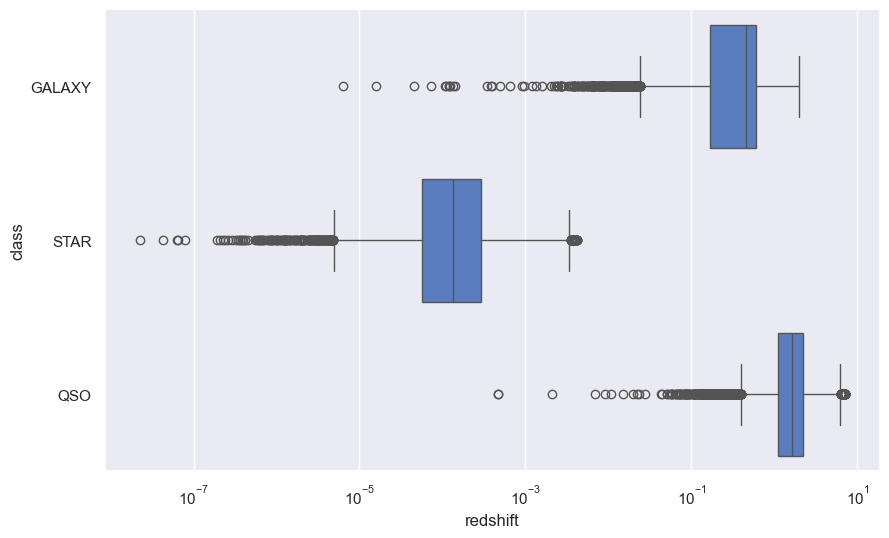

In [103]:
sns.boxplot(x=df['redshift'], y=df['class'], log_scale=True)
plt.show()

#### Correlation

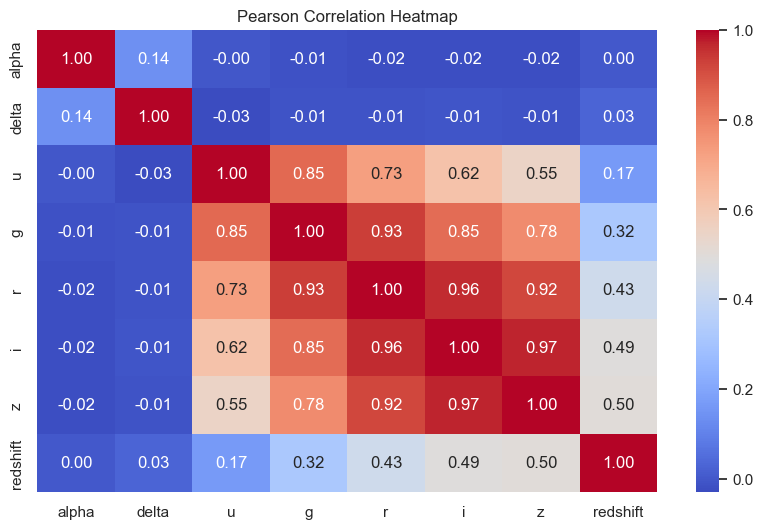

In [108]:
corr_mat = df[num_features].corr(numeric_only=True)

# plt.figure(figsize=(24, 18))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

Unsurprisingly, from what we've seen the filters are all deeply correlated. The redshift is also somewhat correlated particularly with z and i filters.

Note that the non position features are just not correlated with the filters or redshift. Makes sense.

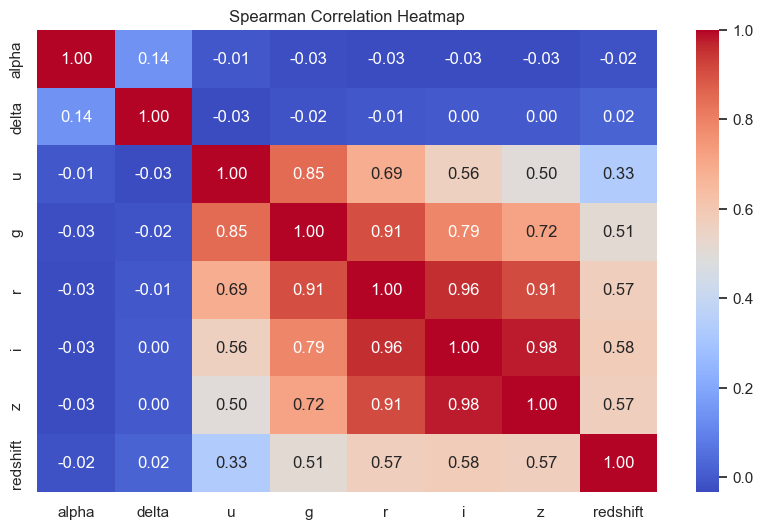

In [109]:
corr_mat = df[num_features].corr(method='spearman', numeric_only=True)

# plt.figure(figsize=(24, 18))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

# Feature Selection/Engineering

Try supervised feature selection from lecture 4 notes. Good to learn

Transform target here?

Section for exploring feature engineering. May be transforming redshift here.

SMOTE may be considered here depending on results

In [13]:
le =  LabelEncoder()
y = df['class']
le.fit(df['class'])
y = le.transform(y)
df['target'] = y

In [134]:
test = f_classif(df[num_features], df['target'])

In [135]:
test

(array([1.88879379e+01, 1.63329604e+02, 3.37104685e+03, 2.92930799e+03,
        3.66141226e+03, 6.61422220e+03, 8.14856962e+03, 6.76020403e+04]),
 array([6.29519229e-09, 1.62662317e-71, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

Need to look into f statistic more. P values suggest all features valuable to keep.

# ML

I want to do both Unsupervised and Supervised

No need for imputation due to clean dataset.

Scaling strategy

- alpha: min-max
- delta: ive elected for min-max
- filters: standard
- redshift: I've elected to use robust scaler without a log transform

In [14]:
le =  LabelEncoder()
le.fit(df['class'])
target = le.transform(df['class'])
df['target'] = target

X_train = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y_train = df['target']

In [15]:
df

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,target
21438,1.237659e+18,239.841100,46.535447,23.32192,20.21041,18.57770,18.00158,17.60835,GALAXY,0.317291,0
86382,1.237666e+18,277.317038,21.728473,18.63515,17.25082,16.67612,16.41048,16.27173,STAR,-0.000232,2
83438,1.237671e+18,154.989358,18.366486,19.36258,17.86072,17.22107,16.95286,16.82554,STAR,-0.000083,2
46565,1.237666e+18,48.215983,0.392381,21.22719,18.74043,17.29778,16.73196,16.40466,GALAXY,0.234615,0
66102,1.237668e+18,222.047394,14.396167,21.78664,19.76055,18.17571,17.61501,17.29110,GALAXY,0.307941,0
...,...,...,...,...,...,...,...,...,...,...,...
8761,1.237666e+18,55.529995,0.703185,24.14796,22.44017,20.62006,19.84461,19.34193,GALAXY,0.883428,0
23896,1.237679e+18,14.897474,2.895642,25.98290,21.42232,19.93544,18.81785,18.30860,GALAXY,0.556607,0
37275,1.237661e+18,131.216773,30.951646,18.04000,16.89182,16.37951,15.99953,15.78924,GALAXY,0.064679,0
84369,1.237654e+18,128.142734,47.811707,21.86465,21.48009,20.92529,20.74541,20.49243,QSO,1.088016,1


In [9]:
target = le.transform(df_test['class'])
df_test['target'] = target

X_test = df_test[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y_test = df_test['target']

## Supervised Methods

Models: Logistic Regression, DT, RF, Gradient boosted model, KNN?, NN method?

### Logistic Regression

#### Pipeline Development

In [71]:
pos_pipeline = make_pipeline(MinMaxScaler())
filter_pipeline = make_pipeline(StandardScaler())
redshift_pipeline = make_pipeline(RobustScaler())

pos_attribs = ['alpha', 'delta']
filter_attribs = ['u', 'g', 'r', 'i', 'z']
redshift_attribs = ['redshift']

preprocessing_pipeline = ColumnTransformer(
    transformers = [
        ('pos', pos_pipeline, pos_attribs),
        ('filter', filter_pipeline, filter_attribs),
        ('redshift', redshift_pipeline, redshift_attribs)
    ])

model = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ('pre', preprocessing_pipeline),
    ('model', model)
    ])

param_grid = {'model__C': [.01, .1, 1, 10, 100], 'model__class_weight':['balanced', None]}

logreg_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1) # imbalanced data change if we SMOTE it up

### Model Training

In [72]:
logreg_grid_search.fit(X_train, y_train)

print(f'Best parameters: {logreg_grid_search.best_params_}')
print(f'Best weighted F1 score: {logreg_grid_search.best_score_}')
best_log_model = logreg_grid_search.best_estimator_

Best parameters: {'model__C': 100, 'model__class_weight': None}
Best weighted F1 score: 0.9612760007207838


#### Test Evaluation

In [75]:
y_pred = best_log_model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

f1_per_class = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}
print("F1-score per class:", f1_per_class)

precision_per_class = {label: metrics['precision'] for label, metrics in report.items() if label.isdigit()}
print("Precision-score per class:", precision_per_class)

recall_per_class = {label: metrics['recall'] for label, metrics in report.items() if label.isdigit()}
print("Recall-score per class:", recall_per_class)

print('Weighted Averages:', report['weighted avg'])

F1-score per class: {'0': 0.9669300556043313, '1': 0.9082468596395412, '2': 0.9864108713029577}
Precision-score per class: {'0': 0.9612635078969244, '1': 0.9416761041902605, '2': 0.973186119873817}
Recall-score per class: {'0': 0.9726638068803095, '1': 0.8771097046413502, '2': 1.0}
Weighted Averages: {'precision': 0.9601244242105509, 'recall': 0.96045, 'f1-score': 0.9600106037995254, 'support': 20000.0}


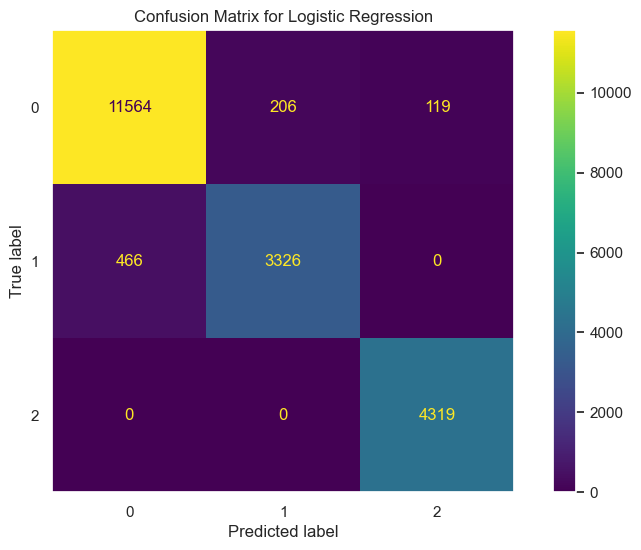

In [74]:
cm_log = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.grid(False)
plt.show()

### KNN

In [59]:
pos_pipeline = make_pipeline(MinMaxScaler())
filter_pipeline = make_pipeline(StandardScaler())
redshift_pipeline = make_pipeline(RobustScaler())

pos_attribs = ['alpha', 'delta']
filter_attribs = ['u', 'g', 'r', 'i', 'z']
redshift_attribs = ['redshift']

preprocessing_pipeline = ColumnTransformer(
    transformers = [
        ('pos', pos_pipeline, pos_attribs),
        ('filter', filter_pipeline, filter_attribs),
        ('redshift', redshift_pipeline, redshift_attribs)
    ])

model = KNeighborsClassifier()

pipeline = Pipeline([
    ('pre', preprocessing_pipeline),
    ('model', model)
    ])

param_grid = {'model__n_neighbors': [1, 3, 5, 7, 10], 'model__weights':['uniform', 'distance']}

knn_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

In [60]:
knn_grid_search.fit(X_train, y_train)

print(f'Best parameters: {knn_grid_search.best_params_}')
print(f'Best weighted F1 score: {knn_grid_search.best_score_}')
best_knn_model = knn_grid_search.best_estimator_

Best parameters: {'model__n_neighbors': 5, 'model__weights': 'distance'}
Best weighted F1 score: 0.9571051515108246


In [76]:
y_pred = best_knn_model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

f1_per_class = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}
print("F1-score per class:", f1_per_class)

precision_per_class = {label: metrics['precision'] for label, metrics in report.items() if label.isdigit()}
print("Precision-score per class:", precision_per_class)

recall_per_class = {label: metrics['recall'] for label, metrics in report.items() if label.isdigit()}
print("Recall-score per class:", recall_per_class)

print('Weighted Averages:', report['weighted avg'])

F1-score per class: {'0': 0.9667915316301191, '1': 0.9349352051835853, '2': 0.9647911241933658}
Precision-score per class: {'0': 0.9675652906486942, '1': 0.9576880530973452, '2': 0.9439521488701816}
Recall-score per class: {'0': 0.9660190091681387, '1': 0.9132383966244726, '2': 0.9865709655012734}
Weighted Averages: {'precision': 0.9605933084418886, 'recall': 0.96045, 'f1-score': 0.9603195841498895, 'support': 20000.0}


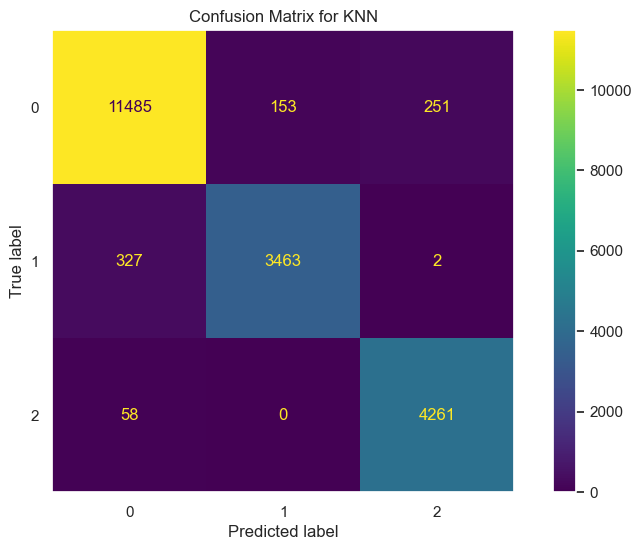

In [64]:
cm_knn = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.title('Confusion Matrix for KNN')
plt.grid(False)
plt.show()

### Decision Tree

may return but would rather play with Unsupervised

In [87]:
model = DecisionTreeClassifier(random_state=269)

pipeline = Pipeline([('model', model)])

param_grid = {'model__max_depth': [2, 5, 10, 15, None],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 5, 10, 20],
            'model__class_weight':['balanced', None]}

dt_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

In [88]:
dt_grid_search.fit(X_train, y_train)

print(f'Best parameters: {dt_grid_search.best_params_}')
print(f'Best weighted F1 score: {dt_grid_search.best_score_}')
best_dt_model = dt_grid_search.best_estimator_

Best parameters: {'model__class_weight': None, 'model__max_depth': 10, 'model__min_samples_leaf': 20, 'model__min_samples_split': 2}
Best weighted F1 score: 0.9748631407519017


In [89]:
y_pred = best_dt_model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

f1_per_class = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}
print("F1-score per class:", f1_per_class)

precision_per_class = {label: metrics['precision'] for label, metrics in report.items() if label.isdigit()}
print("Precision-score per class:", precision_per_class)

recall_per_class = {label: metrics['recall'] for label, metrics in report.items() if label.isdigit()}
print("Recall-score per class:", recall_per_class)

print('Weighted Averages:', report['weighted avg'])

F1-score per class: {'0': 0.9784383504291396, '1': 0.9338876223682446, '2': 0.9974589974589975}
Precision-score per class: {'0': 0.9740746915638546, '1': 0.9500682128240109, '2': 0.9951601751555658}
Recall-score per class: {'0': 0.9828412818571789, '1': 0.9182489451476793, '2': 0.9997684649224358}
Weighted Averages: {'precision': 0.9740764733764102, 'recall': 0.97425, 'f1-score': 0.9740990411148918, 'support': 20000.0}


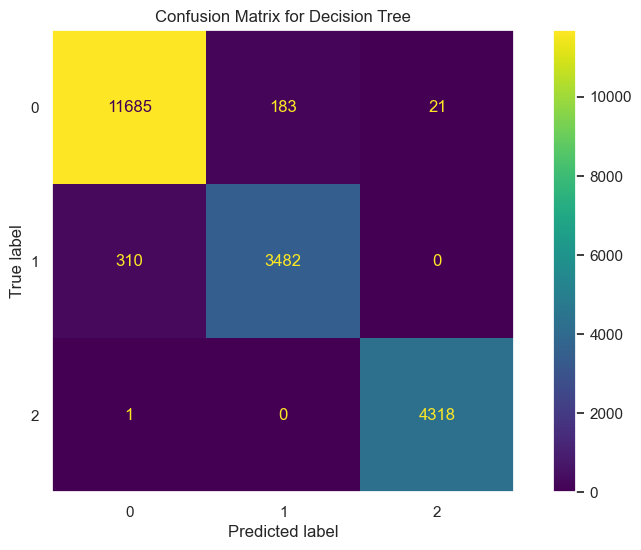

In [90]:
cm_dt = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.grid(False)
plt.show()

### DT2

In [91]:
model = DecisionTreeClassifier(random_state=269)

pipeline = Pipeline([('model', model)])

param_grid = {'model__max_depth': [7, 10, 12, None],
            'model__min_samples_split': [2, 3, 4, 5],
            'model__min_samples_leaf': [15, 20, 25, 30],
            'model__class_weight':['balanced', None]}

dt2_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

In [92]:
dt2_grid_search.fit(X_train, y_train)

print(f'Best parameters: {dt2_grid_search.best_params_}')
print(f'Best weighted F1 score: {dt2_grid_search.best_score_}')
best_dt2_model = dt2_grid_search.best_estimator_

Best parameters: {'model__class_weight': None, 'model__max_depth': 12, 'model__min_samples_leaf': 30, 'model__min_samples_split': 2}
Best weighted F1 score: 0.9754293466645567


In [93]:
y_pred = best_dt2_model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

f1_per_class = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}
print("F1-score per class:", f1_per_class)

precision_per_class = {label: metrics['precision'] for label, metrics in report.items() if label.isdigit()}
print("Precision-score per class:", precision_per_class)

recall_per_class = {label: metrics['recall'] for label, metrics in report.items() if label.isdigit()}
print("Recall-score per class:", recall_per_class)

print('Weighted Averages:', report['weighted avg'])

F1-score per class: {'0': 0.9791745233605699, '1': 0.9367731586686272, '2': 0.9972267159694939}
Precision-score per class: {'0': 0.9756179024716098, '1': 0.9498509081051776, '2': 0.9953863898500577}
Recall-score per class: {'0': 0.9827571704937337, '1': 0.9240506329113924, '2': 0.999073859689743}
Weighted Averages: {'precision': 0.9750014851891101, 'recall': 0.97515, 'f1-score': 0.9750335956088747, 'support': 20000.0}


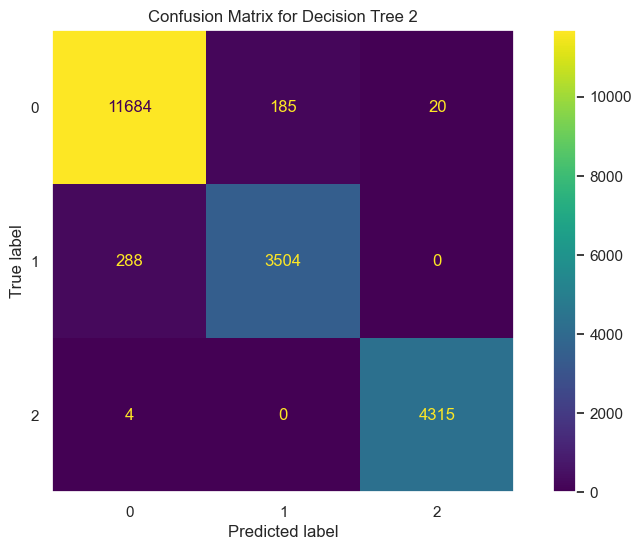

In [94]:
cm_dt2 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt2)
disp.plot()
plt.title('Confusion Matrix for Decision Tree 2')
plt.grid(False)
plt.show()

### Random Forest Classifier

In [10]:
model = RandomForestClassifier(random_state=269, n_jobs=-1)

pipeline = Pipeline([('model', model)])

param_grid = {'model__max_depth': [2, 5, 10, 15, None],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 5, 10, 20],
            'model__class_weight':['balanced', None]}

rf_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

In [11]:
rf_grid_search.fit(X_train, y_train)

print(f'Best parameters: {rf_grid_search.best_params_}')
print(f'Best weighted F1 score: {rf_grid_search.best_score_}')
best_rf_model = rf_grid_search.best_estimator_

Best parameters: {'model__class_weight': 'balanced', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best weighted F1 score: 0.9780971226906667


In [12]:
y_pred = best_rf_model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

f1_per_class = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}
print("F1-score per class:", f1_per_class)

precision_per_class = {label: metrics['precision'] for label, metrics in report.items() if label.isdigit()}
print("Precision-score per class:", precision_per_class)

recall_per_class = {label: metrics['recall'] for label, metrics in report.items() if label.isdigit()}
print("Recall-score per class:", recall_per_class)

print('Weighted Averages:', report['weighted avg'])

F1-score per class: {'0': 0.9807056460051061, '1': 0.9423309584621589, '2': 0.9963082602676512}
Precision-score per class: {'0': 0.9760079973342219, '1': 0.9610638881272279, '2': 0.9928719245803633}
Recall-score per class: {'0': 0.9854487341239802, '1': 0.9243143459915611, '2': 0.9997684649224358}
Weighted Averages: {'precision': 0.9768163593173802, 'recall': 0.97695, 'f1-score': 0.9767991897969599, 'support': 20000.0}


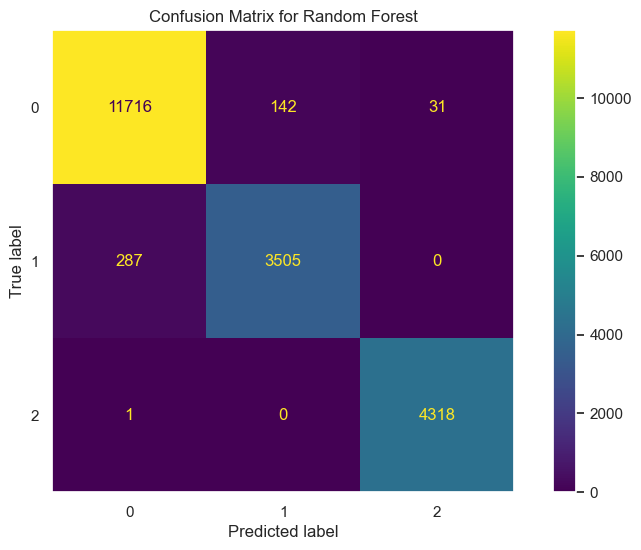

In [13]:
cm_rf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.grid(False)
plt.show()

In [16]:
filename = 'rf_sdss17_objclass_model.sav'
joblib.dump(best_rf_model, filename)

['rf_sdss17_objclass_model.sav']

# Testing on SDSS 16

I want to see how well the RF model transfers over to a new dataset, in this case the Sloan Digital Sky Survey 16. If it performs well than that means we can use other datasets to train object classifiers for future surveys. I also conduct a study of the confidenc of predictions for correctly and incorrect classified objects. This shoul help give a sense of the feasibility of automated classifiers and the necessary effort to manually review them at different confidence levels

## Prediction

In [3]:
df16 = pd.read_csv('sdss16.csv')
df16

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,QSO,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,STAR,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,GALAXY,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,GALAXY,0.084538,721,52228,268


In [4]:
df16.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
df16.drop(['objid', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'plate', 'mjd', 'fiberid'], axis=1, inplace=True)
df16.shape

(100000, 9)

In [6]:
df16

,ra,dec,u,g,r,i,z,class,redshift
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165
3,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155
4,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210
...,...,...,...,...,...,...,...,...,...
99995,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,QSO,0.438182
99996,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,STAR,-0.000497
99997,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,GALAXY,0.004587
99998,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,GALAXY,0.084538


In [102]:
label_key = {0: 'GALAXY',1: 'QSO', 2: 'STAR'}

In [16]:
# using previously fitted labelencoder to ensure the same labels are applied.
target = le.transform(df16['class'])
df16['target'] = target

In [17]:
X_16 = df16.drop(['target', 'class'], axis=1)
y_16 = df16[['target']]

In [18]:
X_16.rename(columns={'ra':'alpha', 'dec': 'delta'}, inplace=True)
X_16.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')

In [19]:
best_rf_model = joblib.load('rf_sdss17_objclass_model.sav')

In [20]:
y_pred = best_rf_model.predict(X_16)

report = classification_report(y_16, y_pred, output_dict=True)

f1_per_class = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}
print("F1-score per class:", f1_per_class)

precision_per_class = {label: metrics['precision'] for label, metrics in report.items() if label.isdigit()}
print("Precision-score per class:", precision_per_class)

recall_per_class = {label: metrics['recall'] for label, metrics in report.items() if label.isdigit()}
print("Recall-score per class:", recall_per_class)

print('Weighted Averages:', report['weighted avg'])

F1-score per class: {'0': 0.9907940049473736, '1': 0.9617433414043584, '2': 0.9977315937848292}
Precision-score per class: {'0': 0.9865924809705962, '1': 0.9861952527559837, '2': 0.9967774895857895}
Recall-score per class: {'0': 0.9950314673733024, '1': 0.9384746243266232, '2': 0.998687526249475}
Weighted Averages: {'precision': 0.9904305311352521, 'recall': 0.99044, 'f1-score': 0.9903630980814043, 'support': 100000.0}


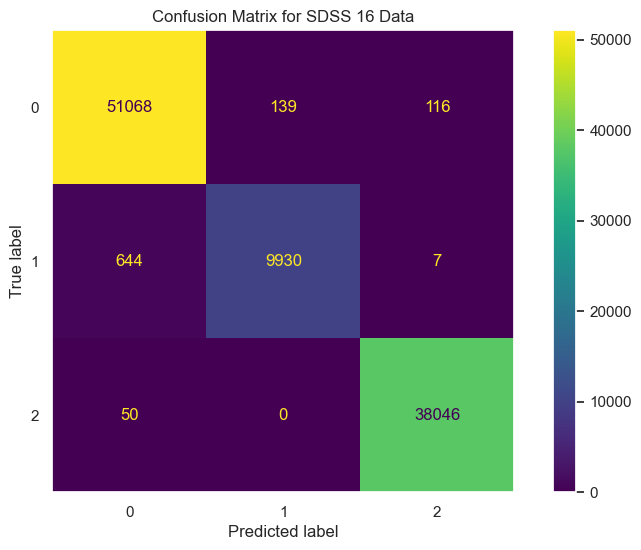

In [21]:
cm = confusion_matrix(y_16, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for SDSS 16 Data')
plt.grid(False)
plt.show()

The results for the SDSS 16 survey are, dare I say, stellar. Clearly we see that training data for previous surveys and using them on new data for the SDSS survey can pay enormous dividends in developing an automated system determining object class. This would reduce the labor of determining objects and could be used as a semi-supervised model with which to develop the classifications.

However, there is error as this method is not perfectly able to classify all objects. As such an important next step is finding if there is some threshold which we can use to flag possible errors for further investigation by a human.

## Prediction Confidence

The basic hypothesis that I have is that lower confidence predictions will be more likely to be wrong and a threshold of confidence can be found to provide an indicator for a human to look into the classifier results and verify them. My goal is to test these hypotheses  by looking at the right and wrong predictions confidence scores and understanding their distribution. Example: if all wrong predictions are under 60%, then that may be a good threshold for human review.

In [22]:
probs = best_rf_model.predict_proba(X_16)

confidence_scores = np.max(probs, axis=1)

print("Confidence scores:", confidence_scores)

Confidence scores: [1.   1.   1.   ... 0.9  0.99 0.99]


In [23]:
tree_preds = np.array([tree.predict(X_16.to_numpy()) for tree in best_rf_model.named_steps['model'].estimators_])
mode_counts = [Counter(tree_preds[:, i]).most_common(1)[0][1] for i in range(len(X_16))]
confidence = np.array(mode_counts) / best_rf_model.named_steps['model'].n_estimators

print("Confidence scores based on tree agreement:", confidence)

Confidence scores based on tree agreement: [1.   1.   1.   ... 0.9  0.99 0.99]


In [24]:
(confidence-confidence_scores).sum()

0.0

No difference in either method. Can use either without issue.

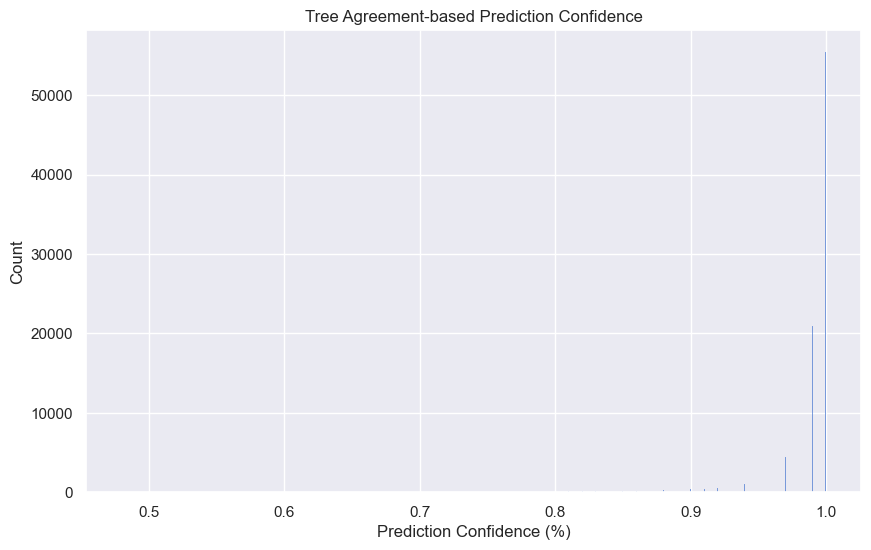

In [25]:
sns.histplot(confidence)
plt.title('Tree Agreement-based Prediction Confidence')
plt.xlabel('Prediction Confidence (%)')
plt.show()

In [26]:
print('Max:', np.max(confidence))
print('Min', np.min(confidence))
print('Mean', np.mean(confidence))
print('Std Dev', np.std(confidence))
print('Median', np.median(confidence))

Max: 1.0
Min 0.48
Mean 0.9824095000000002
Std Dev 0.051041211875796993
Median 1.0


In [27]:
y_test = y_16.to_numpy()

In [28]:
y_test.shape

(100000, 1)

In [29]:
y_pred.shape

(100000,)

In [30]:
y_test=np.reshape(y_test, newshape=(100000,))
y_test.shape

(100000,)

In [31]:
(y_test-y_pred).sum()

366

In [32]:
misclassified_indices = np.where(y_pred != y_test)[0]

In [33]:
len(misclassified_indices)

956

In [34]:
139 + 116 + 644 + 50 + 7 # Adding wrong values from Confusion Matrix

956

In [35]:
misclassified_confidences = confidence[misclassified_indices]

In [36]:
print('Max:', np.max(misclassified_confidences))
print('Min', np.min(misclassified_confidences))
print('Mean', np.mean(misclassified_confidences))
print('Std Dev', np.std(misclassified_confidences))
print('Median', np.median(misclassified_confidences))

Max: 1.0
Min 0.48
Mean 0.789560669456067
Std Dev 0.1730329239270138
Median 0.81


In [37]:
correct_indices = np.where(y_pred == y_test)[0]
correct_confidences = confidence[correct_indices]
print('Max:', np.max(correct_confidences))
print('Min', np.min(correct_confidences))
print('Mean', np.mean(correct_confidences))
print('Std Dev', np.std(correct_confidences))
print('Median', np.median(correct_confidences))

Max: 1.0
Min 0.48
Mean 0.9842709300916763
Std Dev 0.044485042478346705
Median 1.0


In [76]:
print('Max:', np.max(confidence))
print('Min', np.min(confidence))
print('Mean', np.mean(confidence))
print('Std Dev', np.std(confidence))
print('Median', np.median(confidence))

Max: 1.0
Min 0.48
Mean 0.9824095000000002
Std Dev 0.051041211875796993
Median 1.0


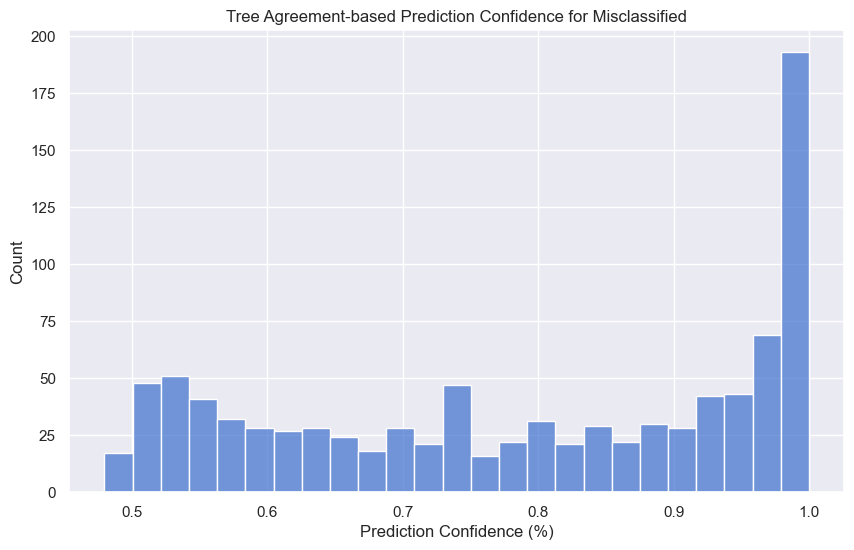

In [38]:
sns.histplot(misclassified_confidences,bins=25)
plt.title('Tree Agreement-based Prediction Confidence for Misclassified')
plt.xlabel('Prediction Confidence (%)')
plt.show()

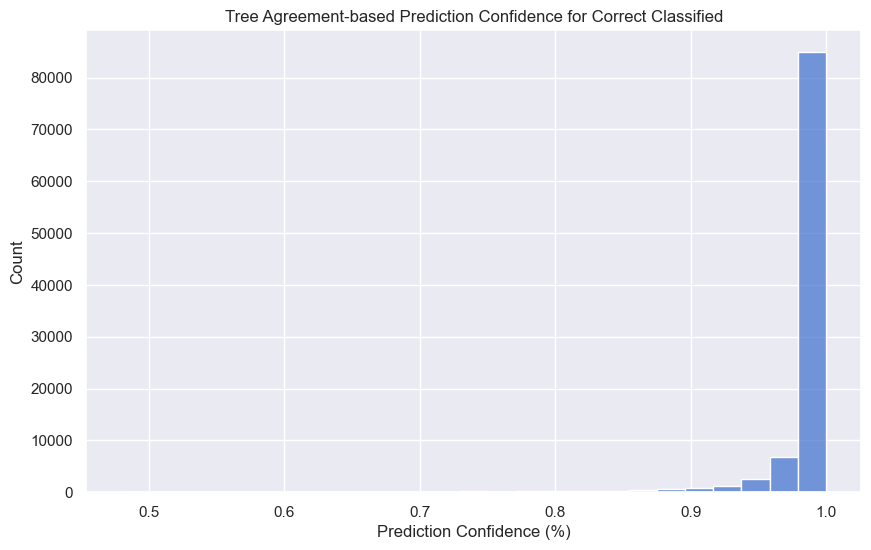

In [39]:
sns.histplot(correct_confidences,bins=25)
plt.title('Tree Agreement-based Prediction Confidence for Correct Classified')
plt.xlabel('Prediction Confidence (%)')
plt.show()

In [40]:
len(np.where(misclassified_confidences <= 0.81)[0])/len(misclassified_confidences)

0.5010460251046025

In [41]:
len(np.where(misclassified_confidences < 1.0)[0])/len(misclassified_confidences)

0.9069037656903766

In [42]:
len(np.where(misclassified_confidences >= 0.9)[0])/len(misclassified_confidences)

0.3922594142259414

In [43]:
len(np.where(correct_confidences <= 0.81)[0])

1443

In [44]:
len(np.where(correct_confidences <= np.mean(correct_confidences))[0])/len(correct_confidences)

0.23011994669035984

In [45]:
len(np.where(correct_confidences == 1.0)[0])/len(correct_confidences)

0.558842534631073

The prediction that missclassified predictions will be lower confidence has been proven mostly wrong. We see very clearly that there are many very high confidence wrong answers. About 10% of the wrong predictions has 100% confidence, about 40% have 90% confidence.

A few things to note, the correct predictions has a much sharper peak of confidence, about 55% of the data is 100% confidence. We also see a much higher mean and median as well as a smaller standard deviation for the correct predictions. The misclassified are more spread out, but there are so few that it's hard to find them in the sheer volume of data.

I will try looking at the ratio of misclassified predictions at different levels of confidence and below to the total number of predictions at that level. This will give an idea of how much additional effort to verify the result is required at each level of confidence.

In [88]:
# We look at mean for confidence because this meant to be for
# automated classfication in which we dont know the true labels yet

levels = [1.0, np.mean(confidence), 0.95, 0.9, 0.85, np.median(misclassified_confidences), 0.8,
          np.mean(misclassified_confidences), 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, np.min(confidence)]


ratios = []
prop_sizes = []
misclass_rawcounts = []

for level in levels:
    proportional_size = len(np.where(misclassified_confidences <= level)[0]) + len(np.where(correct_confidences <= level)[0])
    ratio = len(np.where(misclassified_confidences <= level)[0])/proportional_size * 100
    
    ratios.append(ratio)
    prop_sizes.append(proportional_size)
    misclass_rawcounts.append (len(np.where(misclassified_confidences <= level)[0]))
    
    print(f'Ratio at {level*100:.2f}% : {ratio:.2f}')

Ratio at 100.00% : 0.96
Ratio at 98.24% : 3.42
Ratio at 95.00% : 8.68
Ratio at 90.00% : 15.76
Ratio at 85.00% : 21.56
Ratio at 81.00% : 24.92
Ratio at 80.00% : 25.80
Ratio at 78.96% : 27.12
Ratio at 75.00% : 29.41
Ratio at 70.00% : 31.20
Ratio at 65.00% : 34.09
Ratio at 60.00% : 35.57
Ratio at 55.00% : 40.06
Ratio at 50.00% : 34.69
Ratio at 48.00% : 50.00


In [89]:
ratios

[0.9560000000000001,
 3.4237288135593222,
 8.682597272613538,
 15.760148580525337,
 21.556642216788916,
 24.921956295525494,
 25.8046614872364,
 27.120743034055728,
 29.411764705882355,
 31.204379562043794,
 34.08551068883611,
 35.57377049180328,
 40.058479532163744,
 34.69387755102041,
 50.0]

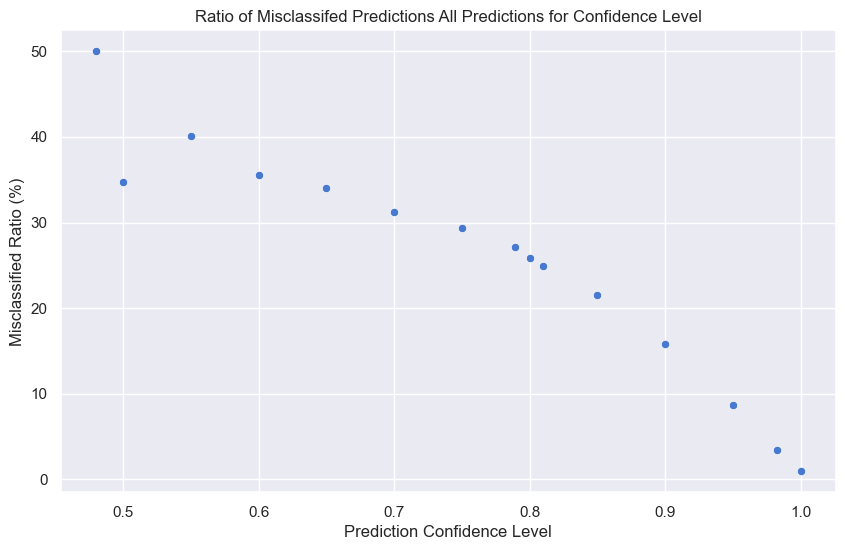

In [90]:
sns.scatterplot(x=levels, y=ratios)
plt.title('Ratio of Misclassifed Predictions All Predictions for Confidence Level')
plt.xlabel('Prediction Confidence Level')
plt.ylabel('Misclassified Ratio (%)')
plt.show()

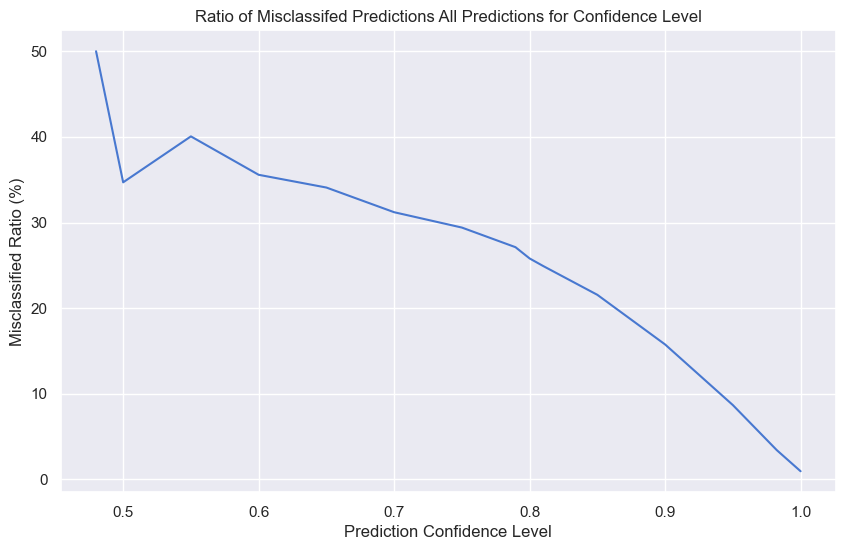

In [91]:
sns.lineplot(x=levels, y=ratios)
plt.title('Ratio of Misclassifed Predictions All Predictions for Confidence Level')
plt.xlabel('Prediction Confidence Level')
plt.ylabel('Misclassified Ratio (%)')
plt.show()

In [93]:
dy = np.gradient(levels, ratios)
d2y = np.gradient(dy, levels) 

elbow_index = np.argmin(np.abs(d2y))
elbow_level = levels[elbow_index]
elbow_ratio = ratios[elbow_index]


In [96]:
d2y

array([-0.017528  , -0.01432113,  0.00571628,  0.04141241,  0.03508411,
       -0.1145693 , -0.01120738,  0.16681906,  0.17328794,  0.04835778,
        0.0415279 ,  0.87414735, -0.43058053, -0.16156639,  0.81807662])

In [94]:
elbow_level

0.95

In [95]:
elbow_ratio

8.682597272613538

We look at the elbow of the line to get a sense of the turning point where it may become increasinly marginal in terms of what is gained by shedding data or alternatively the turning point where the volume of data will begin to rapidly expand. we find that 0.95 is the closest to a 0 gradient, followed by 0.85. Somewhere within the range of these values is where the optimal place to cutoff  likely lies.

In [103]:
data_vol = pd.DataFrame({'Confidence: Level': levels, 'Misclassified as Percent of Total': ratios,
                         'Raw Count of Misclassified': misclass_rawcounts, 'Volume of Data': prop_sizes})

In [104]:
data_vol

,Confidence: Level,Misclassified as Percent of Total,Raw Count of Misclassified,Volume of Data
0,1.000000,0.956000,956,100000
1,0.982410,3.423729,808,23600
2,0.950000,8.682597,694,7993
3,0.900000,15.760149,594,3769
4,0.850000,21.556642,529,2454
5,0.810000,24.921956,479,1922
6,0.800000,25.804661,465,1802
7,0.789561,27.120743,438,1615
8,0.750000,29.411765,410,1394
9,0.700000,31.204380,342,1096


The above table gives a quantitative sense of how valuable is is to verify the lower confidence values. We show a % of the data wrongly classified as well as the raw counts of both the misclassfied and the full amount of data required to sort through. As we go to lower confidence we see a higher proportion of data points misclassified. This, along with the much smaller volume of data, suggests that manual review at these lower counts are time efficient and provide comparatively cost efficient to inspect.

# Conclusion

I found that we were able to obtain very strong results for the SDSS17 dataset. We were able to obtain weighted averages of the following values: precision: 0.97682, recall: 0.97695, and F1-score: 0.97680 for the test dataset using a random forest classifier. These are very competitive results and demonstrates that machine learning is a very powerful tool for the classification of stellar objects. On a more granular level we found stars to be the most easily identifiable objects, achieving >0.99 for all metrics. QSOs where the hardest to distinguish, most commonly being mistaken for galaxies. Nevertheless, we were still able to achieve high quality results even on this hardest class to classify with precision: 0.96106, recall: 0.92431, and F1: 0.94233. Overall, I am very satisfied with these results.

Further, I find that the training transfers very well from the 17th survey to the 16th survey. I achieved weighted averages for the following metrics:
precision: 0.99043, recall: 0.99044, and F1-score: 0.99036. These are all excellent and highly competitive values for our model and demonstrates very clearly the potential of machine learning for classification of stellar objects. I also reviewed the confidence of the predictions in order to determine if the misclassifications were uniformly low confidence results. The idea being that this would allow for an easy rule for manual review if applied to new auto-classfied data. I found that the distribution of confidence, with the volume of data, was not sufficiently different enough from the distribution of correct classifications to warrant an easy suggestion for manual review. Instead, I provide plots and a table showing the ratio of misclassified data as a percent of the total data at that confidence level. This should allow for an approach to manual review that considers efficiency of labor and return on investment at different levels.

# Future Work

I deeply enjoyed this effort and intend to continue applying my data science and astrophysics knowledge to other works. In particular I would like to look at the SDSS18 data and see how well my model transfer to this future (relative to SDSS17) data. Perhaps another useful thing to do would be a deeper inspection of WHY the misclassified objects are being misclassified. What features are the culprits of them appearing different? This could involve looking at the data within this dataset, a literature review, or deeper investigation into the nature of the objects themselves.